In [1]:
""" Fit Continuous Distributions to Data """
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Read the data from Excel file
data = pd.read_excel ("7.4.3_data.xlsx", sheet_name="data1", header=None)
data = data.values.flatten()

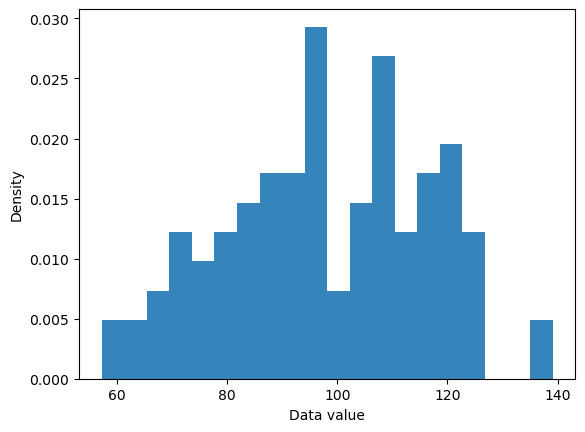


Data Description:
  size = 100
  minmax = (57.2, 139.09)
  mean = 97.77139999999997
  var = 341.0240162020202
  skewness = -0.13339778928348767
  kurtosis= -0.6831564233178393


In [3]:
# Visualize the data with a density histogram and display descrption
bins = 20
fig0, ax0 = plt.subplots(dpi=100)
ax0.hist(data, bins=bins, histtype='stepfilled', density=True, alpha=0.9)
ax0.set_xlabel("Data value")
ax0.set_ylabel("Density")
plt.show()

desc = stats.describe(data)
print("\nData Description:")
print(f"  size = {desc.nobs}")
print(f"  minmax = {desc.minmax}")
print(f"  mean = {desc.mean}")
print(f"  var = {desc.variance}")
print(f"  skewness = {desc.skewness}")
print(f"  kurtosis= {desc.kurtosis}")

In [4]:
# List of distributions to fit
Dists = ['beta','expon','gamma','lognorm','logistic', 'laplace',
         'norm', 'rayleigh','triang','uniform','weibull_min']

In [5]:
# Loop through the list of distributions
res = {}
for d in Dists:
    # Fit distribution to data
    dist = getattr(stats, d)
    print(f"Fitting distribution {d}:")
    params_fit = dist.fit(data)
    # Perform the Kolmogorov-Smirnov test on fitted result.
    Dv, pv = stats.kstest(data, d, args=params_fit)
    # Keep the results 
    res[d] = {'Params': params_fit,
              'KS_D'  : Dv,
              'KS_pv' : pv }

# Sort the results by KS stats
results = {dist: vals for dist, vals in 
        sorted(res.items(), key=lambda x: x[1]['KS_D']) }

Fitting distribution beta:
Fitting distribution expon:
Fitting distribution gamma:
Fitting distribution lognorm:
Fitting distribution logistic:
Fitting distribution laplace:
Fitting distribution norm:
Fitting distribution rayleigh:
Fitting distribution triang:
Fitting distribution uniform:
Fitting distribution weibull_min:


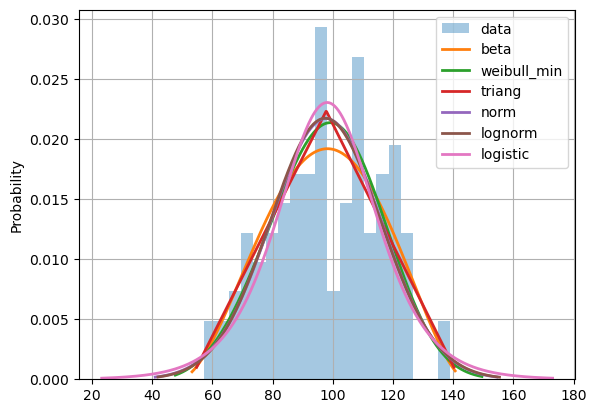

In [6]:
# Compare the PDF of the fitted distributions with the data
max_to_plot = 6
num_to_plot = min(max_to_plot, len(results))

fig1, ax1 = plt.subplots(dpi=100)
ax1.hist(data, bins=bins, histtype='stepfilled', label='data',
         density=True, alpha=0.4)
ax1.set_ylabel("Probability")
for d in list(results.keys())[:num_to_plot]:
    params = results[d]['Params']
    dist = getattr(stats, d)
    x = np.linspace(dist.ppf(0.001, *params), 
                    dist.ppf(0.999, *params), 500)
    pdf_fitted = dist.pdf(x, *params)
    ax1.plot(x, pdf_fitted, lw=2, label=d)
ax1.legend()
ax1.grid('dotted')
plt.show()

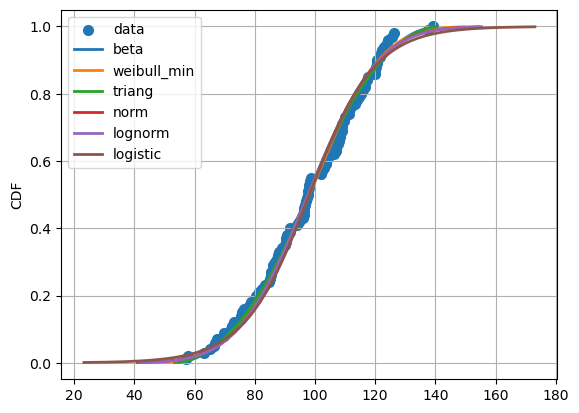

In [7]:
# Compare the CDF of the fitted distributions with the data ECDF
def ecdf(data):
    # Compute ECDF of the data
    x = np.sort(data)
    n = x.size
    y = np.arange(1,n+1)/n
    return(x,y)

fig2, ax2 = plt.subplots(dpi=100)
x, y = ecdf(data)
ax2.scatter(x, y, lw=2, label='data' )
ax2.set_ylabel("CDF")
for d in list(results.keys())[:num_to_plot]:
    params = results[d]['Params']
    dist = getattr(stats, d)
    x = np.linspace(dist.ppf(0.001, *params), 
                    dist.ppf(0.999, *params), 500)
    cdf_fitted = dist.cdf(x, *params)
    ax2.plot(x, cdf_fitted, lw=2, label=d)
ax2.legend()
ax2.grid('dotted')
plt.show()

In [8]:
# Show the top fitted parameters
num_to_show = 6
num_to_show = min(num_to_show, len(Dists))
print(f"\nThe top {num_to_show} distributions:")
  
for i, (d, vals) in enumerate(list(results.items())[:num_to_show]):
    dist = getattr(stats, d)
    params = vals['Params']
    print(f"\nDistribution {i+1}: {d}")
    print(f"  Parameters = {params}")
    print(f"  KS stats = {vals['KS_D']}")
    pv = vals['KS_pv']
    print(f"  p-value = {pv}", end=" ")
    if pv < 0.05:
        print(" < 0.05")
    else:
        print("")
    print(f"  mean = {dist(*params).mean()}")
    print(f"  var = {dist(*params).var()}")
    print(f"  sd = {dist(*params).std()}")


The top 6 distributions:

Distribution 1: beta
  Parameters = (2.9694722641451423, 2.8410772308999013, 48.6010183977518, 96.0358209061009)
  KS stats = 0.0526932223744947
  p-value = 0.9302200495921993 
  mean = 97.67997500732218
  var = 338.3858977910069
  sd = 18.39526835332953

Distribution 2: weibull_min
  Parameters = (3.7755301524300005, 36.82589064297723, 67.57169335277156)
  KS stats = 0.06422909438028257
  p-value = 0.779443120169669 
  mean = 97.87435896417409
  var = 325.58862495960005
  sd = 18.04407451102993

Distribution 3: triang
  Parameters = (0.5036780338389795, 52.73408519584795, 89.51336326076714)
  KS stats = 0.06741904575124746
  p-value = 0.7277895637951273 
  mean = 97.6005112192695
  var = 333.8661136764873
  sd = 18.272003548502482

Distribution 4: norm
  Parameters = (97.77139999999997, 18.374269401529958)
  KS stats = 0.07206510260645305
  p-value = 0.6498079161282216 
  mean = 97.77139999999997
  var = 337.61377604000006
  sd = 18.374269401529958

Distribu